# Hotel Rating Classification

Whenever we are looking for hotels for vacation or travel, we always prefer a hotel known for its services. The best way to find out whether a hotel is right for you or not is to find out what people are saying about the hotel who have stayed there before. Now it is very difficult to read the experience of each person who has given their opinion on the services of the hotel. This is where the task of sentiment analysis comes in.

Well, every industry is now adopting sentiment analysis to assess its reputation in the online market. The hospitality industry is following the same path with hotel reviews sentiment analysis.

# Problem Statement

In this project, our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel. Our major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

In [1]:
import pandas as pd
import string # laungue model
import seaborn as sns
import numpy as np

In [2]:
hotel = pd.read_excel("hotel_reviews.xlsx",sheet_name=0)
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [3]:
#checking the size of the datset
hotel.shape

(20491, 2)

# 1. Data Cleaning

In [4]:
#checking the data types
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [5]:
# missing values
hotel.isnull().sum()

Review    0
Rating    0
dtype: int64

<AxesSubplot:>

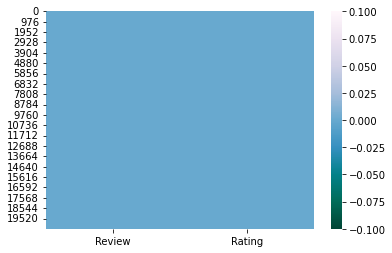

In [6]:
sns.heatmap(hotel.isnull(),cmap="PuBuGn_r")

THere is no any missing value.

In [7]:
#Checking the unique value
sorted(hotel['Rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

The ratings given on the scale of 1 to 5.

In [8]:
#checking the duplicate value
hotel.duplicated().sum()

0

There is no any duplicate value in this dataset.

In [9]:
#checking the summary of the dataset
hotel.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# 2.EDA and Visualization

In [10]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [11]:
#checking the value counts 
hotel['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

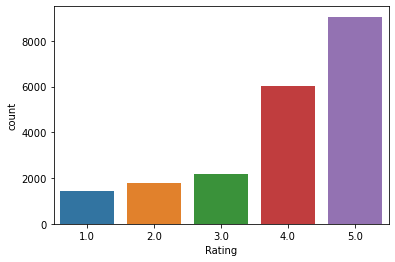

In [12]:
#checking visualization for the value counts 
sns.countplot(x='Rating', data=hotel)

Note:
1. From above visual, we can say that count of ratings for 4, 5 are comparatively much higher than the other rating scores.
Hence, we can say for our data that most of the users are highly satisfied with their experience at hotels.

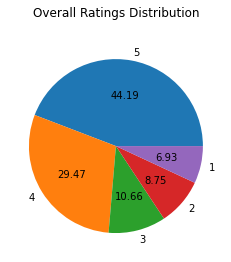

In [13]:
#Checking the total contribution of all ratings

import matplotlib.pyplot as plt
plt.pie(hotel['Rating'].value_counts(), autopct='%0.2f', labels=['5', '4', '3', '2', '1'])
plt.title('Overall Ratings Distribution\n')
plt.show()

Note:
1. From above visual, we can say that almost 75% of reviews are rated (5, 4) by users and remaining 25% reviews are rated (3, 2, 1).
2. We have an unequal distribution of data, where we have less no. of negative ratings provided by users.
3. Hence, our dataset is highly imbalanced dataset.

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

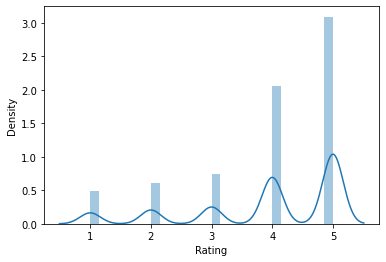

In [14]:
sns.distplot(hotel['Rating'])

From distplot , we can say that almost 75% of reviews are rated (5, 4) by users and remaining 25% reviews are rated (3, 2, 1).
 We have an unequal distribution of data, where we have less no. of negative ratings provided by users.


# 3. Data Cleaning 

In [15]:
# Regular Expression 

In [16]:
import re
import string

In [17]:
# Defining a function which makes all text to lowercas,removes brackets, punctuation and numbers

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[0-9]" "]+'," ",text)
    text = re.sub('[''""..]','',text)
    return text

clean = lambda x:clean_text(x)

In [19]:
hotel['Review']= hotel.Review.apply(clean)

In [20]:
hotel.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not experience hotel monaco seattl...,3.0


# Apply Stemming & Lemmatization

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.

In [21]:
from nltk.stem import WordNetLemmatizer
  
lemma = WordNetLemmatizer()

hotel['Review'] = [lemma.lemmatize(word) for word in hotel['Review']]


In [22]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not experience hotel monaco seattl...,3.0
3,unique great stay wonderful time hotel monaco ...,5.0
4,great stay great stay went seahawk game awesom...,5.0


# Generate wordcloud

In [23]:
from textblob import TextBlob
from wordcloud import WordCloud

In [24]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
                        
    plt.figure(figsize = (6, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

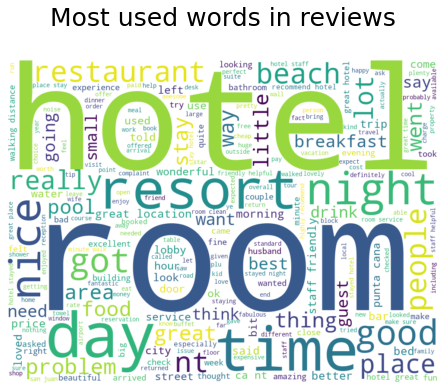

In [25]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=hotel['Review'], title="Most used words in reviews\n")

Note:

1. Hotel, room, time, resort, beach, day, night, & poeple etc. were most commonly used words in overall reviews by users.

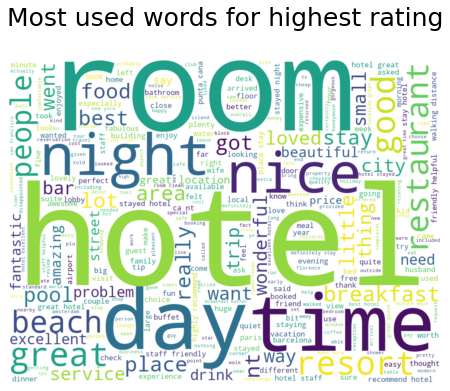

In [26]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(data=hotel[hotel['Rating']==5]['Review'], title="Most used words for highest rating\n")

Note:

1. Great, nice, wonderful, good, loved, restaurant, hotel, room, day, etc. were some frequently used words by users who rated for score of 5, it seems they had a delightful experience at hotel.


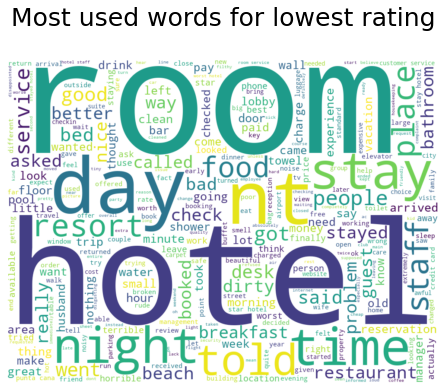

In [27]:
#Plotting the wordcloud on original data for all lowest rating (1)
wordCloud_generator(data=hotel[hotel['Rating']==1]['Review'], title="Most used words for lowest rating\n")

The users who were not happy or rated low for their experience have used Service, problem, staff, desk, better, told, dirty, bad, day, hotel, room, food etc. these words frequently in their reviews.


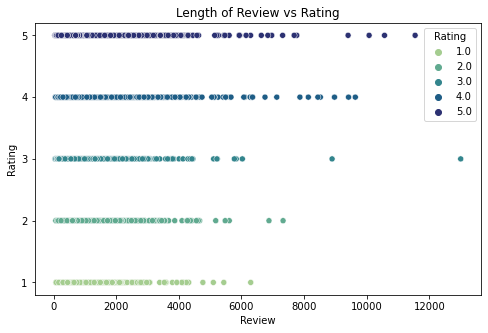

In [28]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=hotel['Review'].apply(len), y=hotel['Rating'], data=hotel, palette='crest', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

Note:
1. From above visual, we can say that the length of review has an effect on ratings.
2. Lower ratings have lower length of review compared to top ratings.
3. Hence, there exists a positive correlation between Length of Reviews & Ratings.

In [29]:
frequency = pd.Series(' '.join(hotel['Review']).split()).value_counts()[:20]

In [30]:
frequency

hotel       48832
room        34300
not         31525
great       21087
nt          18989
good        16972
staff       16203
stay        15153
did         13892
just        12589
nice        12399
rooms       12015
no          11603
location    11032
stayed      10466
service      9961
time         9816
beach        9581
night        9423
clean        9359
dtype: int64

<AxesSubplot:>

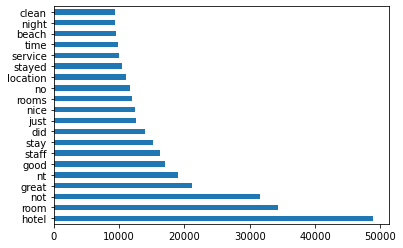

In [31]:
frequency.plot(kind='barh')

Frequency count of words before stop word removal

In this Frequency plot we can see that there are words like clean, night, beach, time, service, stayed, location,no, rooms etc..

# 4. Removal of STOP WORDS

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [34]:
hotel['Review'] = hotel['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [35]:
# Word Frequency after removal of STOP WORDS

In [36]:
frequency2 = pd.Series(' '.join(hotel['Review']).split()).value_counts()[:20]

In [37]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64

<AxesSubplot:>

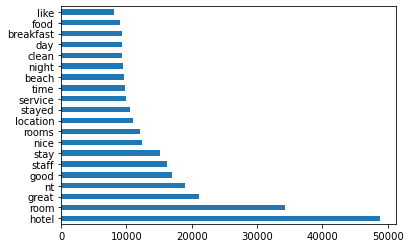

In [38]:
frequency2.plot(kind='barh')

Frequency count of words after stop word removal

In this frequency2 after removal of stop wards we have words like, food, breakfast, day, clean, night, beach, time, service, stayed, location, rooms etc....

# Count Vectoriser

It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

In [40]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X=vectorizer.fit_transform(hotel['Review'])

In [41]:
word_freq_df = pd.DataFrame({'Term':vectorizer.get_feature_names(),'Occurances' : np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['Frequency'] = word_freq_df['Occurances']/np.sum(word_freq_df['Occurances'])


C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
word_freq_df.head(20).sort_values(by='Frequency', ascending=False)

,Term,Occurances,Frequency
1,aaa,60,3.001537e-05
0,aa,13,6.503330e-06
13,aalders,8,4.002049e-06
17,aarp,3,1.500768e-06
16,aaron,3,1.500768e-06
19,aas,2,1.000512e-06
6,aaaare,1,5.002561e-07
7,aaah,1,5.002561e-07
8,aaahhh,1,5.002561e-07
9,aadvantage,1,5.002561e-07


We have applied Count vectorizer and got the top 10 words with their frequency.

# Term Frequency-Inverse Document Frequency(TFIDF)

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
# Top 500 Words

In [45]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 500,max_df =0.5,smooth_idf = True)
doc_vec = vectorizer.fit_transform(hotel['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()


C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
hotel2 = pd.DataFrame(denselist,columns =names_features )

In [47]:
hotel2

,able,absolutely,access,activities,actually,afternoon,air,airport,amazing,amenities,...,worked,working,world,worst,worth,wrong,year,years,yes,york
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.095207,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.195339,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.107348,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.102409,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20487,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20488,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20489,0.0,0.073794,0.0,0.000000,0.037284,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.125307,0.0,0.0,0.0,0.000000,0.105892,0.0,0.00000,0.0


# N-Gram - Words Combination Identification

An N-gram means a sequence of N words

# Bi-gram

which are two words coming together in the corpus(the entire collection of words/sentences).

In [48]:
def top_n2_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(2,2), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [49]:
top2_words_combo = top_n2_words(hotel['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,great location,2139
1,staff friendly,2077
2,ca nt,1809
3,punta cana,1682
4,hotel great,1465


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'great location'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'ca nt'),
 Text(3, 0, 'punta cana'),
 Text(4, 0, 'hotel great'),
 Text(5, 0, 'great hotel'),
 Text(6, 0, 'walking distance'),
 Text(7, 0, 'recommend hotel'),
 Text(8, 0, 'friendly helpful'),
 Text(9, 0, 'hotel staff'),
 Text(10, 0, 'stayed hotel'),
 Text(11, 0, 'room service'),
 Text(12, 0, 'stay hotel'),
 Text(13, 0, 'highly recommend'),
 Text(14, 0, 'room clean'),
 Text(15, 0, 'staff helpful'),
 Text(16, 0, 'place stay'),
 Text(17, 0, 'minute walk'),
 Text(18, 0, 'stayed nights'),
 Text(19, 0, 'hotel stayed')]

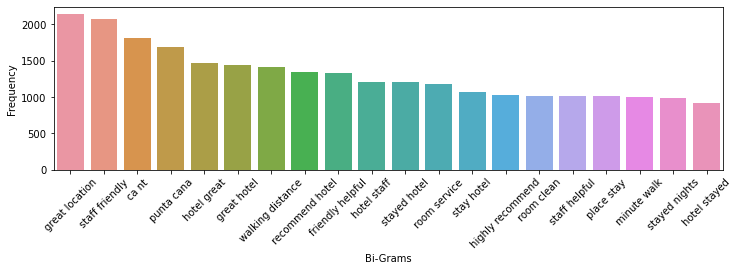

In [51]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])


Using N-Gram we have got the top 20 Bigram in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.

# Bi-Gram for 1 star 

In [52]:
hotelfr1=hotel.loc[hotel['Rating']==1]

In [53]:
top2_words_combo = top_n2_words(hotelfr1['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,punta cana,150
1,credit card,110
2,customer service,104
3,stay hotel,99
4,star hotel,95


[Text(0, 0, 'punta cana'),
 Text(1, 0, 'credit card'),
 Text(2, 0, 'customer service'),
 Text(3, 0, 'stay hotel'),
 Text(4, 0, 'star hotel'),
 Text(5, 0, 'hotel staff'),
 Text(6, 0, 'worst hotel'),
 Text(7, 0, 'room service'),
 Text(8, 0, 'stay away'),
 Text(9, 0, 'hotel room'),
 Text(10, 0, 'ca nt'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'air conditioning'),
 Text(13, 0, 'got room'),
 Text(14, 0, 'nt stay'),
 Text(15, 0, 'travel agent'),
 Text(16, 0, 'nt work'),
 Text(17, 0, 'san juan'),
 Text(18, 0, 'booked hotel'),
 Text(19, 0, 'hotel stayed')]

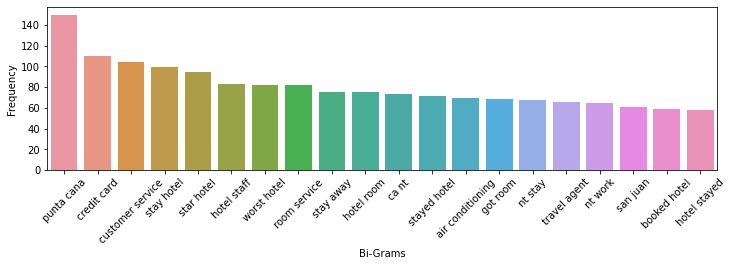

In [54]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])

Using N-Gram we have got the top 20 Bigram for 1 Star Reviews in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.


# Bi-Gram for 5 star 

In [55]:
hotelfr5=hotel.loc[hotel['Rating']==5]

In [56]:
top2_words_combo = top_n2_words(hotelfr5['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,staff friendly,957
1,great location,956
2,great hotel,923
3,ca nt,911
4,recommend hotel,816


[Text(0, 0, 'staff friendly'),
 Text(1, 0, 'great location'),
 Text(2, 0, 'great hotel'),
 Text(3, 0, 'ca nt'),
 Text(4, 0, 'recommend hotel'),
 Text(5, 0, 'hotel great'),
 Text(6, 0, 'friendly helpful'),
 Text(7, 0, 'highly recommend'),
 Text(8, 0, 'walking distance'),
 Text(9, 0, 'hotel staff'),
 Text(10, 0, 'punta cana'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'place stay'),
 Text(13, 0, 'hotel stayed'),
 Text(14, 0, 'stay hotel'),
 Text(15, 0, 'staff helpful'),
 Text(16, 0, 'definitely stay'),
 Text(17, 0, 'new york'),
 Text(18, 0, 'room service'),
 Text(19, 0, 'minute walk')]

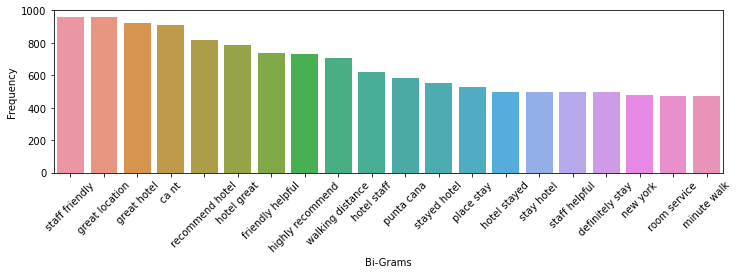

In [57]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])

Using N-Gram we have got the top 20 Bigram for 5 Star Reviews in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.


# Tri-gram

In [58]:
def top_n3_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(3,3), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [59]:
top3_words_combo = top_n3_words(hotel['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,staff friendly helpful,700
1,hotel great location,541
2,old san juan,354
3,highly recommend hotel,313
4,great place stay,273


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'highly recommend hotel'),
 Text(4, 0, 'great place stay'),
 Text(5, 0, 'ca nt wait'),
 Text(6, 0, 'king size bed'),
 Text(7, 0, 'flat screen tv'),
 Text(8, 0, 'great hotel great'),
 Text(9, 0, 'good value money'),
 Text(10, 0, 'stayed hotel nights'),
 Text(11, 0, 'hotel staff friendly'),
 Text(12, 0, 'easy walking distance'),
 Text(13, 0, 'free internet access'),
 Text(14, 0, 'ca nt beat'),
 Text(15, 0, 'hotel good location'),
 Text(16, 0, 'la carte restaurants'),
 Text(17, 0, 'staff helpful friendly'),
 Text(18, 0, 'ca nt say'),
 Text(19, 0, 'returned night stay')]

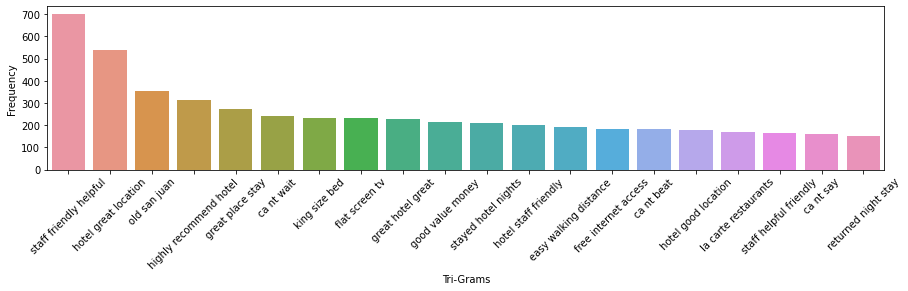

In [60]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

Using N-Gram we have got the top 20 Trigram in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.


# Tri-gram for 1 star 

In [61]:
top3_words_combo = top_n3_words(hotelfr1['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,worst hotel stayed,30
1,worst hotel experience,16
2,old san juan,14
3,nt waste money,13
4,finally got room,13


In [62]:
hotelfr1=hotel.loc[hotel['Rating']==1]
hotelfr1

,Review,Rating
15,horrible customer service hotel stay february ...,1.0
32,noise airconditionera standard arranged stay t...,1.0
40,bad choice booked hotel hot wire called immedi...,1.0
65,hated inn terrible roomservice horrible staff ...,1.0
69,ace grunge lives mold mildew tiny bed metal si...,1.0
...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1.0
20460,june stay stayed hotel june read reviews websi...,1.0
20465,stay hotel brought group february worst hotel ...,1.0
20467,returning la concha nightmare surprising hotel...,1.0


[Text(0, 0, 'worst hotel stayed'),
 Text(1, 0, 'worst hotel experience'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'nt waste money'),
 Text(4, 0, 'finally got room'),
 Text(5, 0, 'king size bed'),
 Text(6, 0, 'year old son'),
 Text(7, 0, 'resort punta cana'),
 Text(8, 0, 'melia caribe tropical'),
 Text(9, 0, 'good thing hotel'),
 Text(10, 0, 'holiday inn express'),
 Text(11, 0, 'ca nt believe'),
 Text(12, 0, 'nt speak spanish'),
 Text(13, 0, 'non smoking room'),
 Text(14, 0, 'called desk told'),
 Text(15, 0, 'staff extremely rude'),
 Text(16, 0, 'make matters worse'),
 Text(17, 0, 'stay away hotel'),
 Text(18, 0, 'long story short'),
 Text(19, 0, 'credit card details')]

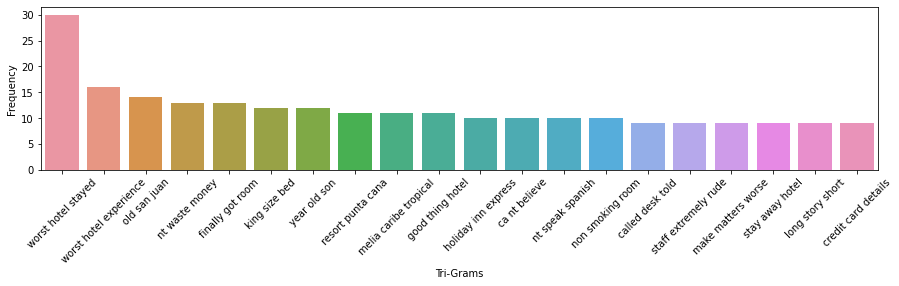

In [63]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

Using N-Gram we have got the top 20 Trigram for 1 Star Reviews in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.


# Tri-gram for 5 star

In [64]:
top3_words_combo = top_n3_words(hotelfr5['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,staff friendly helpful,364
1,hotel great location,290
2,highly recommend hotel,257
3,ca nt wait,195
4,great hotel great,167


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'highly recommend hotel'),
 Text(3, 0, 'ca nt wait'),
 Text(4, 0, 'great hotel great'),
 Text(5, 0, 'great place stay'),
 Text(6, 0, 'flat screen tv'),
 Text(7, 0, 'old san juan'),
 Text(8, 0, 'hotel staff friendly'),
 Text(9, 0, 'king size bed'),
 Text(10, 0, 'ca nt say'),
 Text(11, 0, 'free internet access'),
 Text(12, 0, 'great location great'),
 Text(13, 0, 'easy walking distance'),
 Text(14, 0, 'staff helpful friendly'),
 Text(15, 0, 'staff extremely helpful'),
 Text(16, 0, 'definitely recommend hotel'),
 Text(17, 0, 'ca nt beat'),
 Text(18, 0, 'stayed hotel nights'),
 Text(19, 0, 'staff extremely friendly')]

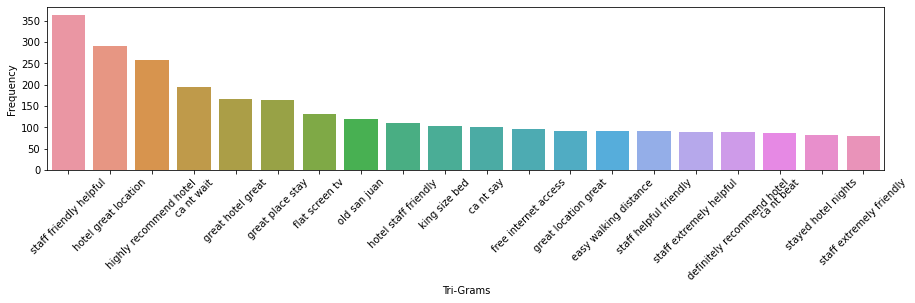

In [65]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

Using N-Gram we have got the top 20 Trigram for 5 Star Reviews in the text which can be useful for the review analysis and knowing the context of words which customers are using frequently.


# Create Bag of Words (BOW): CountVectorizer

The bag-of-words model is simple to understand and implement and has seen great success in problems such as language modeling and document classification.

In [66]:
X = hotel["Review"]

In [67]:
X

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms experience hotel monaco seattle goo...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm ca nt beat...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside desk staff nt par...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Review, Length: 20491, dtype: object

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
cv = CountVectorizer(max_features=1500)
cv_X = cv.fit_transform(X)

In [70]:
cv_X.shape

(20491, 1500)

#### We will classify all reviews:
#### with Rating== 1 or 2 or 3 as overall - '0'.
#### with Sentiment == 4 or5 as overall - '1'.

In [71]:
 classification = hotel["Rating"].apply(lambda rating : 1 if rating == 4.0 or 5.0 else 0)

In [72]:
y=[]
for i in hotel["Rating"]:
  if i == 4.0 or i == 5.0 :
    y.append(1)
  else:
    y.append(0)
hotel["rate"]= y

In [73]:
hotel.head()

,Review,Rating,rate
0,nice hotel expensive parking got good deal sta...,4.0,1
1,ok nothing special charge diamond member hilto...,2.0,0
2,nice rooms experience hotel monaco seattle goo...,3.0,0
3,unique great stay wonderful time hotel monaco ...,5.0,1
4,great stay great stay went seahawk game awesom...,5.0,1


In [74]:
y = hotel["rate"]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(cv_X,y,train_size=0.75,random_state=0)

In [76]:
X_train.shape,X_test.shape

((15368, 1500), (5123, 1500))

# Apply Naive Bayes Algorithm

The Naive Bayes classification algorithm is a probabilistic classifier. It is based on probability models that incorporate strong independence assumptions. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
model1 = MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [80]:
y_pred1 = model1.predict(X_test)
confusion_matrix(y_test,y_pred1)

array([[ 982,  385],
       [ 351, 3405]], dtype=int64)

In [81]:
accuracy_score(y_test,y_pred1)

0.8563341791918797

In [82]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1367
           1       0.90      0.91      0.90      3756

    accuracy                           0.86      5123
   macro avg       0.82      0.81      0.81      5123
weighted avg       0.86      0.86      0.86      5123



<AxesSubplot:>

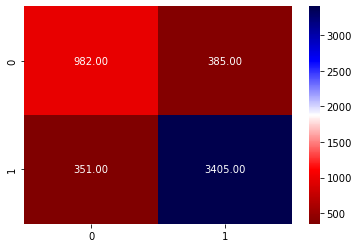

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred1), annot=True, fmt='.2f', cmap='seismic_r')

# Apply Logistic Regression Algorithm

Logistic Regression meaning:
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive
analysis algorithm and based on the concept of probability.

In [84]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred2 = model2.predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[1007,  360],
       [ 279, 3477]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred2)

0.8752683974233847

In [87]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1367
           1       0.91      0.93      0.92      3756

    accuracy                           0.88      5123
   macro avg       0.84      0.83      0.84      5123
weighted avg       0.87      0.88      0.87      5123



<AxesSubplot:>

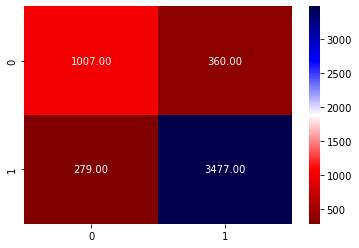

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred2), annot=True, fmt='.2f', cmap='seismic_r')

# Apply Random Forest Algorithm

Random forest is constructed using multiple decision tree and final decision is obtained by mejority votes decision tree.

In [89]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y_pred3 = model3.predict(X_test)
confusion_matrix(y_test,y_pred3)

array([[ 713,  654],
       [  99, 3657]], dtype=int64)

In [91]:
accuracy_score(y_test,y_pred3)

0.8530158110482139

In [92]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65      1367
           1       0.85      0.97      0.91      3756

    accuracy                           0.85      5123
   macro avg       0.86      0.75      0.78      5123
weighted avg       0.86      0.85      0.84      5123



<AxesSubplot:>

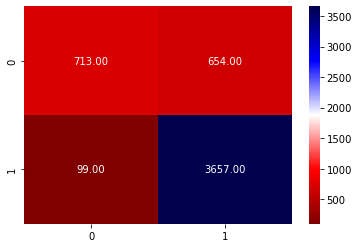

In [93]:
sns.heatmap(confusion_matrix(y_test,y_pred3), annot=True, fmt='.2f', cmap='seismic_r')

1. Multinomial Naïve Bayes = 0.8563
2. Logistic regression = 0.8752
3. Random Forest = 0.8553

# Select Final Algorithm

In [94]:
print("FInal Model is Logistic regression = 0.8752 ")

FInal Model is Logistic regression = 0.8752 


# Pipeline

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
classifier = []
classifier.append(('cv', CountVectorizer()))
classifier.append(("model",LogisticRegression()))

In [98]:
classifier

[('cv', CountVectorizer()), ('model', LogisticRegression())]

In [99]:
model= Pipeline(classifier)

In [100]:
model

Pipeline(steps=[('cv', CountVectorizer()), ('model', LogisticRegression())])

In [101]:
X

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms experience hotel monaco seattle goo...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm ca nt beat...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside desk staff nt par...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Review, Length: 20491, dtype: object

In [102]:
model.fit(X,y)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('model', LogisticRegression())])

# Effective Ways To Attract Hotel Customers. 

1. Impress  Visitors before their arrival.
2. Maintain the Excellent Room Services.
3. Offer better rates with re-recreational facilities.
4. Establish an online presence.
5. Take an advantage of social media.
6. Build customer loyalty program.

# Model Saving

In [103]:
import pickle

In [104]:
f1 = open(file="Hotel_Final_model.pkl",mode="wb")
pickle.dump(model,f1)
f1.close()